Notebook to select genes and species
====================================

Basic enums
-----------

In [76]:
from enum import Enum, auto
class Normalize(Enum):
    log2 = "log2"
    standardize = "standardize"
    clr = "clr"

class AnimalClass(Enum):
    Mammalia = "Mammalia"    
    mammals = "Mammalia"    
    Aves = "Aves"    
    birds = "Aves"        
    Reptilia = "Reptilia"
    reptiles = "Reptilia"    
    Coelacanthi = "Coelacanthi"
    Teleostei = "Teleostei"
    bone_fish = "Teleostei"
    
    @staticmethod
    def tsv():
        return [cl.name.capitalize()+".tsv" for cl in AnimalClass]

class Orthology(Enum):
    one2one = "one2one"
    one2many = "one2many"
    one2many_directed = "one2many_directed"
    one2oneplus_directed = "one2oneplus_directed"
    many2many = "many2many"
    all = "all"

## Parameters cell ##
Parameters are overiddent by papermill when run inside DVC stages

In [1]:
# Parameters
drop_species = [ "Tupaia_belangeri", "Erinaceus_europaeus"] #["Tursiops_truncatus","Sarcophilus_harrisii","Cavia_aperea", "Tupaia_belangeri", "Erinaceus_europaeus"]
orthology =  Orthology.one2oneplus_directed.name
reference_species = "Homo_sapiens"
animal_class = AnimalClass.mammals.name



reading parameters

In [77]:
ortho = Orthology[orthology]
cl = AnimalClass[animal_class]

#### Load dependencies ####

In [5]:
from dataclasses import dataclass
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pprint
pp = pprint.PrettyPrinter(indent=4)

#### Load pathes ####

In [7]:
from pathlib import Path
if(Path("./data").exists()):
    base_dir = Path("./")
else:
    base_dir = Path("../")
print(base_dir.absolute())

data_dir = base_dir / "data"
input_dir = data_dir / "input"
interim_dir = data_dir / "interim"
output_dir =  data_dir / "output"
genes_dir = input_dir / "genes"
expressions_dir = input_dir / "expressions"
path_by_class = genes_dir / "by_animal_class"
path_all = genes_dir / "all"

/data/sources/species/notebooks/..


In [8]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

## Load gene tables ##

In [9]:
load_path = path_by_class / cl.name.capitalize() / (ortho.name + ".tsv")
load_path

PosixPath('../data/input/genes/by_animal_class/Mammalia/one2oneplus_directed.tsv')

In [10]:
def load_table(path: Path, index: str = None, dtype: str = None):    
    if index is None:
        return pd.read_csv(str(path), sep="\t", dtype=dtype)
    else:
        return pd.read_csv(str(path), sep="\t", index_col=index, dtype=dtype)

genes = load_table(path_by_class / cl.name.capitalize() / (ortho.name + ".tsv"), reference_species, "str")
print(genes.shape)
genes.head()

(67996, 35)


,Pan_troglodytes,Equus_caballus,Pan_paniscus,Tursiops_truncatus,Macaca_mulatta,Macaca_fascicularis,Macaca_nemestrina,Ailuropoda_melanoleuca,Ursus_americanus,Heterocephalus_glaber,Rhinolophus_ferrumequinum,Felis_catus,Sus_scrofa,Bos_grunniens,Ovis_aries,Callithrix_jacchus,Ornithorhynchus_anatinus,Phascolarctos_cinereus,Capra_hircus,Suricata_suricatta,Bos_taurus,Otolemur_garnettii,Microcebus_murinus,Sarcophilus_harrisii,Cavia_porcellus,Erinaceus_europaeus,Tupaia_belangeri,Oryctolagus_cuniculus,Meriones_unguiculatus,Cavia_aperea,Monodelphis_domestica,Mus_musculus,Mesocricetus_auratus,Rattus_norvegicus,Mus_spicilegus
Homo_sapiens,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000242265,ENSPTRG00000023648,ENSECAG00000001603,ENSPPAG00000030053,ENSTTRG00000003114,ENSMMUG00000032524,ENSMFAG00000045560,ENSMNEG00000037924,ENSAMEG00000019304,NaN,NaN,ENSRFEG00010011916,ENSFCAG00000041002,ENSSSCG00000036049,ENSBGRG00000010269,ENSOARG00000002475,ENSCJAG00000033086,NaN,ENSPCIG00000028966,NaN,ENSSSUG00005000112,ENSBTAG00000053735,ENSOGAG00000031169,ENSMICG00000001469,NaN,NaN,NaN,NaN,ENSOCUG00000027535,ENSMUGG00000022866;ENSMUGG00000022860,ENSCAPG00000010493,NaN,ENSMUSG00000092035,ENSMAUG00000018656,NaN,ENSMSIG00000000323
ENSG00000139990,ENSPTRG00000006478,ENSECAG00000010524,ENSPPAG00000042013,ENSTTRG00000013941,ENSMMUG00000019346,ENSMFAG00000003413,ENSMNEG00000028207,ENSAMEG00000014443,ENSUAMG00000010770,ENSHGLG00100003336;ENSHGLG00100017958;ENSHGLG0...,ENSRFEG00010004811,ENSFCAG00000029516,ENSSSCG00000039701,ENSBGRG00000007044,ENSOARG00000021180,ENSCJAG00000042954,ENSOANG00000012620,ENSPCIG00000010372,ENSCHIG00000021848,ENSSSUG00005006529,ENSBTAG00000048519,ENSOGAG00000008452,ENSMICG00000046667,ENSSHAG00000000665,ENSCPOG00000032392,ENSEEUG00000011616,NaN,ENSOCUG00000010281,ENSMUGG00000023917,ENSCAPG00000014053,ENSMODG00000010219,ENSMUSG00000049106,ENSMAUG00000004350,ENSRNOG00000004556,ENSMSIG00000015740
ENSG00000073921,ENSPTRG00000004141,ENSECAG00000019264,ENSPPAG00000036162,ENSTTRG00000001554,ENSMMUG00000019618,ENSMFAG00000002978,ENSMNEG00000029285,ENSAMEG00000008778,ENSUAMG00000018059,ENSHGLG00100018440,ENSRFEG00010012989,ENSFCAG00000029123,ENSSSCG00000014913,ENSBGRG00000024679,ENSOARG00000004654,ENSCJAG00000014262,ENSOANG00000013205,ENSPCIG00000018862,ENSCHIG00000015634,ENSSSUG00005014072,ENSBTAG00000001657,ENSOGAG00000013950,ENSMICG00000017261,ENSSHAG00000004629,ENSCPOG00000020758,ENSEEUG00000013932,ENSTBEG00000000600,ENSOCUG00000023809,ENSMUGG00000002616,ENSCAPG00000000355,ENSMODG00000004297,ENSMUSG00000039361,ENSMAUG00000011448,ENSRNOG00000018322,ENSMSIG00000002381
ENSG00000139687,ENSPTRG00000005864,ENSECAG00000014575,ENSPPAG00000002165,ENSTTRG00000004232,ENSMMUG00000007891,ENSMFAG00000004544,ENSMNEG00000030265,ENSAMEG00000003640,ENSUAMG00000011956,ENSHGLG00100008595,ENSRFEG00010000766,ENSFCAG00000024529,ENSSSCG00000009401,ENSBGRG00000020100,ENSOARG00000008246,ENSCJAG00000009076,ENSOANG00000031580;ENSOANG00000015555,ENSPCIG00000029307,ENSCHIG00000004374,ENSSSUG00005003247,ENSBTAG00000006640,ENSOGAG00000007461,ENSMICG00000001747,ENSSHAG00000014024,ENSCPOG00000008683,ENSEEUG00000000076,ENSTBEG00000014454,ENSOCUG00000016404,ENSMUGG00000019124,ENSCAPG00000014795,ENSMODG00000011168,ENSMUSG00000022105,ENSMAUG00000020865,ENSRNOG00000016029,ENSMSIG00000007265
ENSG00000119977,ENSPTRG00000002786,ENSECAG00000016594,ENSPPAG00000043730,ENSTTRG00000003261,ENSMMUG00000003103,ENSMFAG00000001575,ENSMNEG00000037026,ENSAMEG00000015948,ENSUAMG00000021674,ENSHGLG00100006578,ENSRFEG00010015913,ENSFCAG00000023675,ENSSSCG00000010496,ENSBGRG00000025629,ENSOARG00000006497,ENSCJAG00000016206,ENSOANG00000019944,ENSPCIG00000020525,ENSCHIG00000021683,ENSSSUG00005007325,ENSBTAG00000011841,ENSOGAG00000003757,ENSMICG00000015970,NaN,ENSCPOG00000021974,ENSEEUG00000002616,ENSTBEG00000010577,ENSOCUG00000005964,ENSMUGG00000008987,NaN,ENSMODG00000004976,ENSMUSG00000025008,ENSMAUG00000021808,ENSRNOG00000047112;ENSRNOG00000060994,ENSMSIG00000005758


### Load species and samples ###

In [11]:
species = load_table(input_dir / "species.tsv")
species.head(3)

,species,common_name,animal_class,lifespan,ensembl_url,mass_g,metabolic_rate,temperature_kelvin,taxon
0,Strigops_habroptila,Kakapo,Aves,60.0,https://www.ensembl.org/Strigops_habroptila,NaN,NaN,NaN,taxon#2489341
1,Anser_brachyrhynchus,Pink-footed goose,Aves,40.9,https://www.ensembl.org/Anser_brachyrhynchus,NaN,NaN,NaN,taxon#132585
2,Gallus_gallus,Red junglefowl,Aves,30.0,https://www.ensembl.org/Gallus_gallus,2710.0,6.005,NaN,taxon#9031


In [74]:
selected_species = species[species.animal_class.eq(cl.name)]
selected_species_upd = selected_species[~selected_species.species.isin(drop_species)]
selected_species_upd.head(3)

,species,common_name,animal_class,lifespan,ensembl_url,mass_g,metabolic_rate,temperature_kelvin,taxon
26,Homo_sapiens,Human,Mammalia,122.5,https://www.ensembl.org/Homo_sapiens,70000.0,82.78,310.15,taxon#9606
27,Loxodonta_africana,African bush elephant,Mammalia,65.0,https://www.ensembl.org/Loxodonta_africana,NaN,NaN,309.35,taxon#9785
28,Pan_troglodytes,Chimpanzee,Mammalia,59.4,https://www.ensembl.org/Pan_troglodytes,NaN,NaN,308.85,taxon#9598


In [38]:
samples = load_table(input_dir / "samples.tsv")
samples_ext = samples.merge(species, on="species", how="inner")
selected_samples_ext = samples_ext[samples_ext["animal_class"] ==  cl.name]
selected_samples_ext.head(3)

,bioproject,series,run,species,tissue,sample_name,characteristics,sequencer,age,sex,tumor,source,study,study_title,salmon_version,library_layout,library_selection,library_strategy,lib_type,bootstrap,modified,protocol,common_name,animal_class,lifespan,ensembl_url,mass_g,metabolic_rate,temperature_kelvin,taxon
0,PRJNA247712,PRJNA247712,SRR1287653,Ailuropoda_melanoleuca,Blood,SL01,no;Model organism or animal;19;female;blood;SL...,Illumina_HiSeq_2000,19,female,no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,PAIRED,PCR,RNA-Seq,A,96,13:39.812,NaN,Giant panda,Mammalia,36.8,https://www.ensembl.org/Ailuropoda_melanoleuca,NaN,NaN,NaN,taxon#9646
1,PRJNA247712,PRJNA247712,SRR1287654,Ailuropoda_melanoleuca,Blood,XB01,no;Model organism or animal;12;male;blood;XB01...,Illumina_HiSeq_2000,12,male,no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,PAIRED,PCR,RNA-Seq,A,96,40:17.122,NaN,Giant panda,Mammalia,36.8,https://www.ensembl.org/Ailuropoda_melanoleuca,NaN,NaN,NaN,taxon#9646
2,PRJNA247712,PRJNA247712,SRR1287655,Ailuropoda_melanoleuca,Blood,XB02,no;Model organism or animal;6;female;blood;XB0...,Illumina_HiSeq_2000,6,female,no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,PAIRED,PCR,RNA-Seq,A,128,23:40.197,NaN,Giant panda,Mammalia,36.8,https://www.ensembl.org/Ailuropoda_melanoleuca,NaN,NaN,NaN,taxon#9646


Count how many samples do we have by tissue and species

In [39]:
by_tissue_count = selected_samples_ext.groupby("tissue").run.count().sort_values(ascending=False)
by_tissue_count

tissue
Liver     122
Brain     107
Kidney     83
Heart      39
Lung       35
Blood      12
Muscle      6
Skin        2
Mix         1
Name: run, dtype: int64

In [40]:
by_species_count = selected_samples_ext.groupby(["species", "common_name"]).run.count().sort_values(ascending=False).to_frame().reset_index()
by_species_count

,species,common_name,run
0,Rattus_norvegicus,Norway rat,57
1,Cavia_porcellus,Guinea pig,26
2,Mesocricetus_auratus,Golden hamster,24
3,Bos_grunniens,Yak,22
4,Felis_catus,Domestic cat,22
5,Meriones_unguiculatus,Mongolian jird,17
6,Pan_paniscus,Pygmy chimpanzee or bonobo,16
7,Ornithorhynchus_anatinus,Duck-billed platypus,16
8,Heterocephalus_glaber,Naked mole-rat,15
9,Ovis_aries,Domestic sheep or mouflon,13


In [41]:
def samples_in(*cols):
    spc = by_species_count.set_index("species")
    return sum([spc.loc[c].run for c in cols])


In [42]:
by_species_tissue_count = selected_samples_ext.sort_values(["species", "tissue"], ascending=False).groupby(["species", "common_name", "tissue"]).run.count()
by_species_tissue_count

species                    common_name                 tissue
Ailuropoda_melanoleuca     Giant panda                 Blood      3
                                                       Liver      1
Bos_grunniens              Yak                         Brain      1
                                                       Heart      5
                                                       Kidney     5
                                                       Liver      5
                                                       Lung       6
Bos_taurus                 Domestic cattle             Blood      1
                                                       Kidney     4
                                                       Liver      2
                                                       Muscle     1
Callithrix_jacchus         White-tufted-ear marmoset   Brain      4
                                                       Heart      3
                                                      

### Filter genes ###

count intersection genes

In [16]:
def gc(df: pd.DataFrame, species: pd.DataFrame = None, index_field: str = None) -> pd.DataFrame:
    frame = df.notna().sum().sort_values(ascending=False).to_frame("genes")
    result = frame.reset_index().rename( columns= {"index": "species"})
    if species is None:
        return result
    else:
        field = "common_name" if index_field is None else index_field        
        return result.merge(species, on="species", how="inner").set_index(field)

def count_genes(df: pd.DataFrame, *without):
    return df.drop(columns=np.array(without)).dropna().shape


Genes with deleted species

In [53]:
genes_upd = genes.drop(columns =drop_species)
genes_upd.head()

,Pan_troglodytes,Equus_caballus,Pan_paniscus,Tursiops_truncatus,Macaca_mulatta,Macaca_fascicularis,Macaca_nemestrina,Ailuropoda_melanoleuca,Ursus_americanus,Heterocephalus_glaber,Rhinolophus_ferrumequinum,Felis_catus,Sus_scrofa,Bos_grunniens,Ovis_aries,Callithrix_jacchus,Ornithorhynchus_anatinus,Phascolarctos_cinereus,Capra_hircus,Suricata_suricatta,Bos_taurus,Otolemur_garnettii,Microcebus_murinus,Sarcophilus_harrisii,Cavia_porcellus,Oryctolagus_cuniculus,Meriones_unguiculatus,Cavia_aperea,Monodelphis_domestica,Mus_musculus,Mesocricetus_auratus,Rattus_norvegicus,Mus_spicilegus
Homo_sapiens,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000242265,ENSPTRG00000023648,ENSECAG00000001603,ENSPPAG00000030053,ENSTTRG00000003114,ENSMMUG00000032524,ENSMFAG00000045560,ENSMNEG00000037924,ENSAMEG00000019304,NaN,NaN,ENSRFEG00010011916,ENSFCAG00000041002,ENSSSCG00000036049,ENSBGRG00000010269,ENSOARG00000002475,ENSCJAG00000033086,NaN,ENSPCIG00000028966,NaN,ENSSSUG00005000112,ENSBTAG00000053735,ENSOGAG00000031169,ENSMICG00000001469,NaN,NaN,ENSOCUG00000027535,ENSMUGG00000022866;ENSMUGG00000022860,ENSCAPG00000010493,NaN,ENSMUSG00000092035,ENSMAUG00000018656,NaN,ENSMSIG00000000323
ENSG00000139990,ENSPTRG00000006478,ENSECAG00000010524,ENSPPAG00000042013,ENSTTRG00000013941,ENSMMUG00000019346,ENSMFAG00000003413,ENSMNEG00000028207,ENSAMEG00000014443,ENSUAMG00000010770,ENSHGLG00100003336;ENSHGLG00100017958;ENSHGLG0...,ENSRFEG00010004811,ENSFCAG00000029516,ENSSSCG00000039701,ENSBGRG00000007044,ENSOARG00000021180,ENSCJAG00000042954,ENSOANG00000012620,ENSPCIG00000010372,ENSCHIG00000021848,ENSSSUG00005006529,ENSBTAG00000048519,ENSOGAG00000008452,ENSMICG00000046667,ENSSHAG00000000665,ENSCPOG00000032392,ENSOCUG00000010281,ENSMUGG00000023917,ENSCAPG00000014053,ENSMODG00000010219,ENSMUSG00000049106,ENSMAUG00000004350,ENSRNOG00000004556,ENSMSIG00000015740
ENSG00000073921,ENSPTRG00000004141,ENSECAG00000019264,ENSPPAG00000036162,ENSTTRG00000001554,ENSMMUG00000019618,ENSMFAG00000002978,ENSMNEG00000029285,ENSAMEG00000008778,ENSUAMG00000018059,ENSHGLG00100018440,ENSRFEG00010012989,ENSFCAG00000029123,ENSSSCG00000014913,ENSBGRG00000024679,ENSOARG00000004654,ENSCJAG00000014262,ENSOANG00000013205,ENSPCIG00000018862,ENSCHIG00000015634,ENSSSUG00005014072,ENSBTAG00000001657,ENSOGAG00000013950,ENSMICG00000017261,ENSSHAG00000004629,ENSCPOG00000020758,ENSOCUG00000023809,ENSMUGG00000002616,ENSCAPG00000000355,ENSMODG00000004297,ENSMUSG00000039361,ENSMAUG00000011448,ENSRNOG00000018322,ENSMSIG00000002381
ENSG00000139687,ENSPTRG00000005864,ENSECAG00000014575,ENSPPAG00000002165,ENSTTRG00000004232,ENSMMUG00000007891,ENSMFAG00000004544,ENSMNEG00000030265,ENSAMEG00000003640,ENSUAMG00000011956,ENSHGLG00100008595,ENSRFEG00010000766,ENSFCAG00000024529,ENSSSCG00000009401,ENSBGRG00000020100,ENSOARG00000008246,ENSCJAG00000009076,ENSOANG00000031580;ENSOANG00000015555,ENSPCIG00000029307,ENSCHIG00000004374,ENSSSUG00005003247,ENSBTAG00000006640,ENSOGAG00000007461,ENSMICG00000001747,ENSSHAG00000014024,ENSCPOG00000008683,ENSOCUG00000016404,ENSMUGG00000019124,ENSCAPG00000014795,ENSMODG00000011168,ENSMUSG00000022105,ENSMAUG00000020865,ENSRNOG00000016029,ENSMSIG00000007265
ENSG00000119977,ENSPTRG00000002786,ENSECAG00000016594,ENSPPAG00000043730,ENSTTRG00000003261,ENSMMUG00000003103,ENSMFAG00000001575,ENSMNEG00000037026,ENSAMEG00000015948,ENSUAMG00000021674,ENSHGLG00100006578,ENSRFEG00010015913,ENSFCAG00000023675,ENSSSCG00000010496,ENSBGRG00000025629,ENSOARG00000006497,ENSCJAG00000016206,ENSOANG00000019944,ENSPCIG00000020525,ENSCHIG00000021683,ENSSSUG00005007325,ENSBTAG00000011841,ENSOGAG00000003757,ENSMICG00000015970,NaN,ENSCPOG00000021974,ENSOCUG00000005964,ENSMUGG00000008987,NaN,ENSMODG00000004976,ENSMUSG00000025008,ENSMAUG00000021808,ENSRNOG00000047112;ENSRNOG00000060994,ENSMSIG00000005758


## Missing value analysis ##

In [54]:
def show_missing(df: pd.DataFrame, title: str = "missing plot", ax = None):
     return sns.heatmap(df.notnull(), cbar=False,ax=ax).set_title(title)      
  
def compare_missing(one: pd.DataFrame, two: pd.DataFrame, one_title: str, two_title: str):
    print("Missing values comparison:")
    print("before: "+str(one.dropna().shape) +" || after: "+str(two.dropna().shape))    
    print("samples lost:"+str(samples_in(drop_species)))    
    print("Figures:")
    fig, axs = plt.subplots(1,2,figsize=(20,12))
    plt.subplots_adjust(left=0.125, bottom=0.3, right=0.9, top=1.1, wspace=0.3, hspace=0.8)        
    sns.heatmap(one.notnull(), cbar=False,ax=axs[0]).set_title(one_title)    
    sns.heatmap(two.notnull(), cbar=False,ax=axs[1]).set_title(two_title)


Missing values comparison:
before: (4292, 35) || after: (5404, 33)
samples lost:species
Tupaia_belangeri       7
Erinaceus_europaeus    6
Name: run, dtype: int64
Figures:


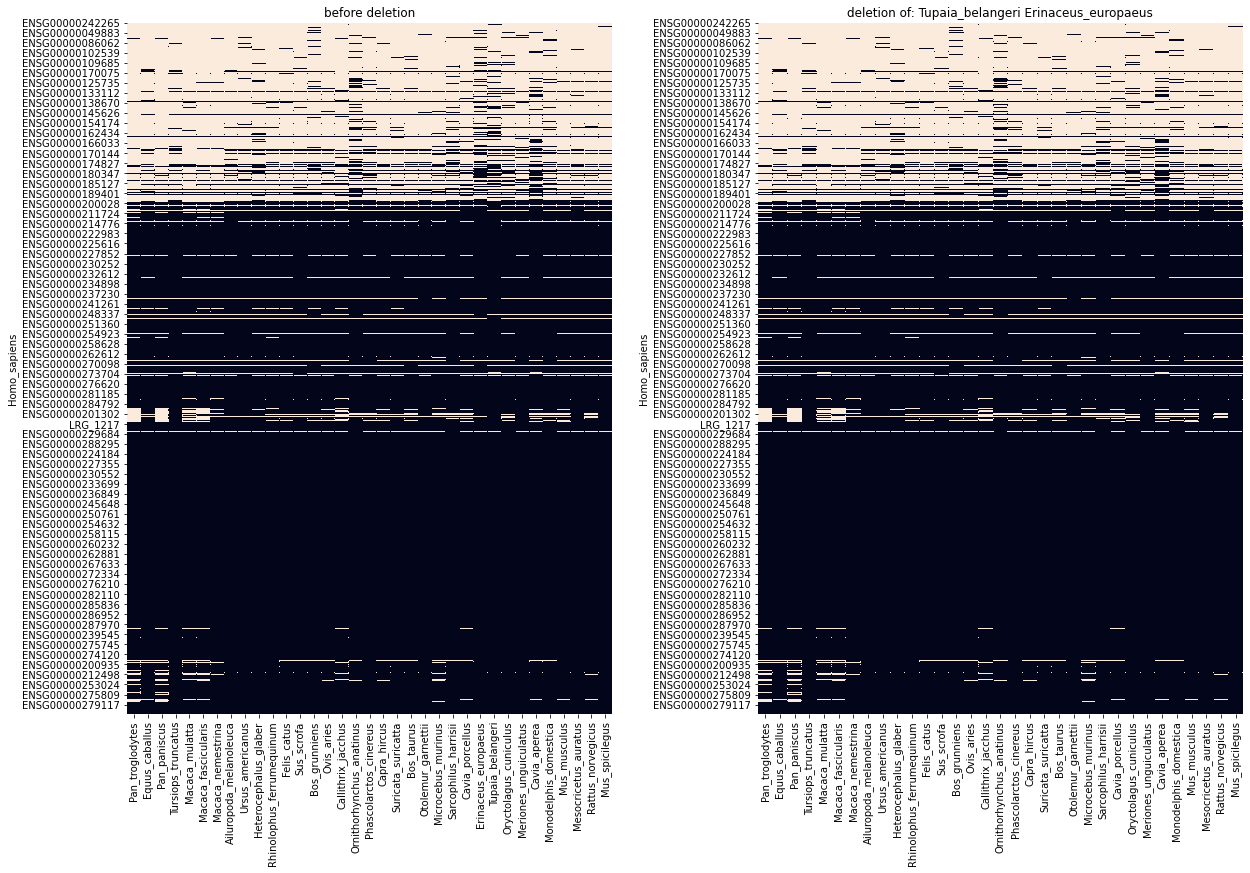

In [55]:
compare_missing(genes, genes_upd, "before deletion", "deletion of: "+" ".join(drop_species))

## Writing removal results ##

Write selected species

In [75]:
selected_species_path = interim_dir / "selected_species.tsv" 
selected_species_upd.to_csv(selected_species_path, sep = "\t", index = False)
print("wrote selected species to "+str(selected_species_path))

wrote selected species to ../data/interim/selected_species.tsv


In [66]:
selected_genes_path = interim_dir / "selected_genes.tsv" 
genes_upd.to_csv(selected_genes_path, sep = "\t", index = False)
print("wrote selected genes to "+str(selected_genes_path))

wrote selected genes to ../data/interim/selected_genes.tsv


In [67]:
selected_samples_path = interim_dir / "selected_samples.tsv" 
selected_samples_ext_upd = selected_samples_ext[~selected_samples_ext.species.isin(drop_species)]
print("selected samples: "+str(selected_samples_ext_upd.shape[0])+" out of "+ str(selected_samples_ext.shape[0])+ " in "+cl.name + " or "+str(samples_ext.shape[0])+" in total")
selected_samples_ext_upd.to_csv(str(selected_samples_path), sep="\t", index = False)
print("wrote selected samples to "+str(selected_samples_path))

selected samples: 394 out of 407 in Mammalia or 490 in total
wrote selected samples to ../data/interim/selected_samples.tsv
